В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдені параметри моделі близькими до ваших найкращих припущень?

In [106]:
import pandas as pd
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

****Передбачення методом МНК****

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta


In [43]:
y = non_smoker_df['charges']
X = non_smoker_df['age']

X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [44]:
X

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [45]:
X_with_intercept

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [46]:
y

1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
5       3756.62160
           ...    
1332   11411.68500
1333   10600.54830
1334    2205.98080
1335    1629.83350
1336    2007.94500
Name: charges, Length: 1064, dtype: float64

In [47]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [99]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

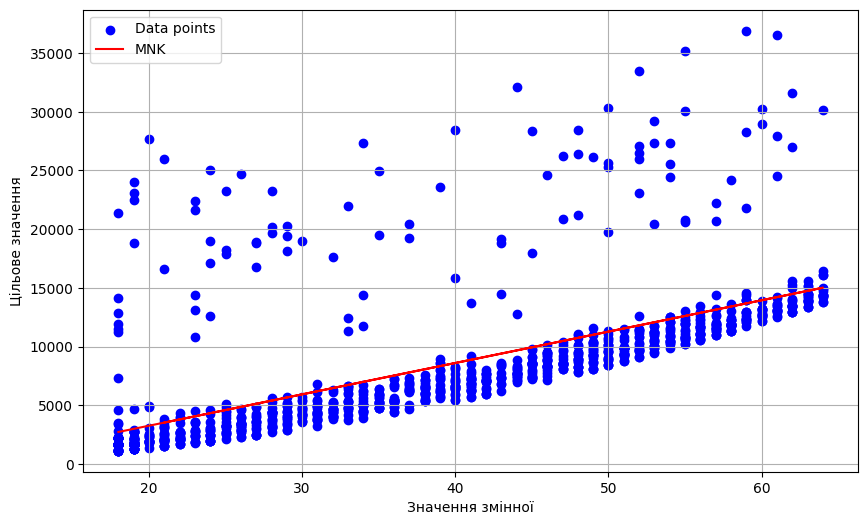

In [108]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

rmse = root_mean_squared_error(y, predictions_MNK)

****Передбачення за допомогою Full-batch градієнтним спуском з numpy****

In [129]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []

    for _ in range(epochs):
        y_pred = m * X[:, 1] + b
        error = y_pred - y
        errors.append(sum(error**2))

        m_gradient = (2/n) * np.dot(error, X[:, 1])
        b_gradient = (2/n) * np.sum(error)

        print(f"m_gradient: {m_gradient}, b_gradient: {b_gradient}")

        m = m - lr * m_gradient
        b = b - lr * b_gradient

        # Check for NaN or Inf
        if np.isnan(m) or np.isnan(b) or np.isinf(m) or np.isinf(b):
            print("Encountered NaN or Inf in parameters. Stopping training.")
            break

    return m, b, errors


X_with_intercept_2 = np.c_[np.ones((X.shape[0], 1)), X]

X_with_intercept_2[:, 1] = (X_with_intercept_2[:, 1] - np.mean(X_with_intercept_2[:, 1])) / np.std(X_with_intercept_2[:, 1])

m_gradient: -7524.013816905602, b_gradient: -16868.53659571241
m_gradient: -6019.21105352449, b_gradient: -13494.829276569923
m_gradient: -4815.368842819588, b_gradient: -10795.86342125594
m_gradient: -3852.2950742556723, b_gradient: -8636.69073700475
m_gradient: -3081.836059404544, b_gradient: -6909.352589603801
m_gradient: -2465.468847523626, b_gradient: -5527.482071683041
m_gradient: -1972.3750780189002, b_gradient: -4421.985657346431
m_gradient: -1577.9000624151233, b_gradient: -3537.588525877146
m_gradient: -1262.3200499320972, b_gradient: -2830.0708207017165
m_gradient: -1009.8560399456796, b_gradient: -2264.056656561374
m_gradient: -807.884831956541, b_gradient: -1811.2453252491
m_gradient: -646.3078655652356, b_gradient: -1448.9962601992797
m_gradient: -517.046292452188, b_gradient: -1159.1970081594231
m_gradient: -413.6370339617506, b_gradient: -927.3576065275378
m_gradient: -330.9096271694007, b_gradient: -741.8860852220303
m_gradient: -264.72770173552124, b_gradient: -593.50

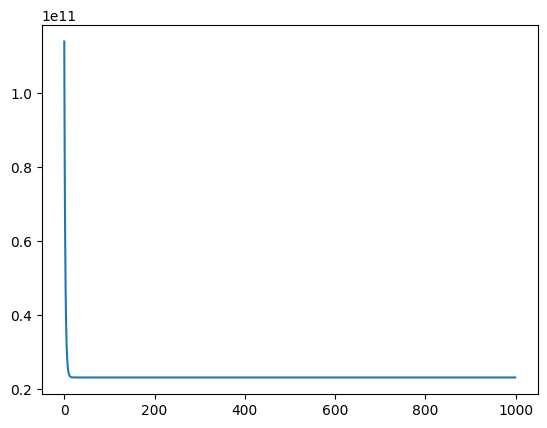

In [130]:

m, b, full_batch_errors = full_batch_gradient_descent(X_with_intercept_2, y, lr=0.1, epochs=1000)
predictions_fbgd = m * X_with_intercept_2[:, 1] + b

print("m:", m)
print("b:", b)
plt.plot(full_batch_errors);

m_gradient: -7524.013816905602, b_gradient: -16868.53659571241
m_gradient: -7373.533540567499, b_gradient: -16531.16586379816
m_gradient: -7226.0628697561415, b_gradient: -16200.542546522194
m_gradient: -7081.541612361037, b_gradient: -15876.531695591751
m_gradient: -6939.910780113818, b_gradient: -15559.001061679915
m_gradient: -6801.112564511519, b_gradient: -15247.821040446315
m_gradient: -6665.090313221306, b_gradient: -14942.86461963739
m_gradient: -6531.788506956875, b_gradient: -14644.007327244643
m_gradient: -6401.15273681773, b_gradient: -14351.12718069975
m_gradient: -6273.129682081387, b_gradient: -14064.104637085753
m_gradient: -6147.667088439749, b_gradient: -13782.82254434404
m_gradient: -6024.713746670953, b_gradient: -13507.16609345716
m_gradient: -5904.219471737532, b_gradient: -13237.022771588016
m_gradient: -5786.13508230278, b_gradient: -12972.282316156256
m_gradient: -5670.412380656725, b_gradient: -12712.836669833128
m_gradient: -5557.0041330436015, b_gradient: -1

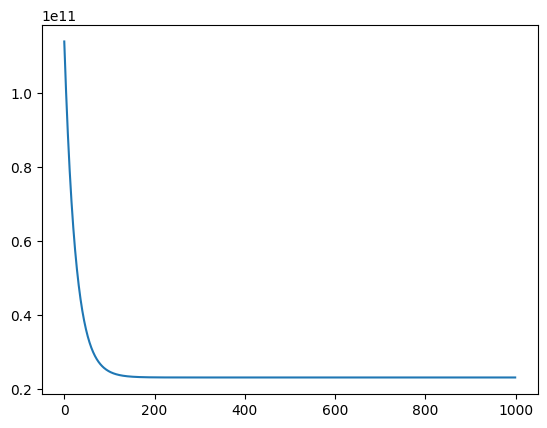

In [131]:
m, b, full_batch_errors = full_batch_gradient_descent(X_with_intercept_2, y, lr=0.01, epochs=1000)
predictions_fbgd = m * X_with_intercept_2[:, 1] + b

print("m:",m)
print("b:", b)

# Графік
plt.plot(full_batch_errors);

m_gradient: -7524.013816905602, b_gradient: -16868.53659571241
m_gradient: -7508.965789271798, b_gradient: -16834.79952252098
m_gradient: -7493.94785769326, b_gradient: -16801.12992347594
m_gradient: -7478.959961977872, b_gradient: -16767.527663628985
m_gradient: -7464.002042053903, b_gradient: -16733.99260830173
m_gradient: -7449.0740379698045, b_gradient: -16700.524623085126
m_gradient: -7434.1758898938715, b_gradient: -16667.123573838955
m_gradient: -7419.3075381140725, b_gradient: -16633.789326691276
m_gradient: -7404.468923037852, b_gradient: -16600.521748037892
m_gradient: -7389.659985191766, b_gradient: -16567.32070454182
m_gradient: -7374.880665221389, b_gradient: -16534.186063132736
m_gradient: -7360.13090389094, b_gradient: -16501.117691006468
m_gradient: -7345.41064208316, b_gradient: -16468.11545562446
m_gradient: -7330.719820798991, b_gradient: -16435.179224713207
m_gradient: -7316.058381157399, b_gradient: -16402.30886626378
m_gradient: -7301.426264395095, b_gradient: -16

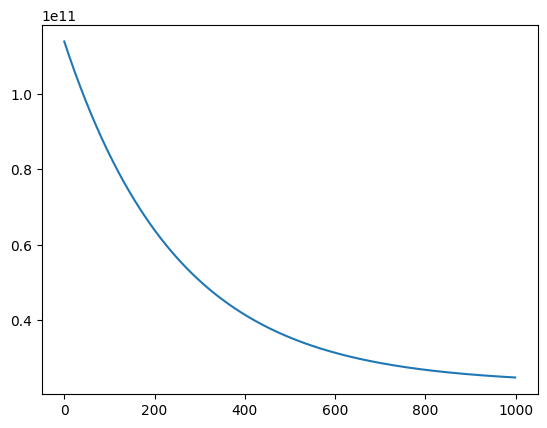

In [132]:
m, b, full_batch_errors = full_batch_gradient_descent(X_with_intercept_2, y, lr=0.001, epochs=1000)
predictions_fbgd = m * X_with_intercept_2[:, 1] + b

print("m:",m)
print("b:", b)

# Графік
plt.plot(full_batch_errors);

rmse_fbgd = root_mean_squared_error(y, predictions_fbgd)

Для мене найкращим learning rate був 0.001

****Передбачення за допомогою scikit-learn.LinearRegression****

In [73]:
!pip install scikit-learn --quiet
from sklearn.linear_model import LinearRegression

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X.to_frame(), y)

LinearRegression()

In [76]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.420556565021)

In [110]:
predictions_sklearn = lin_reg.predict(X.to_frame())

rmse_sklearn = root_mean_squared_error(y, predictions_sklearn)

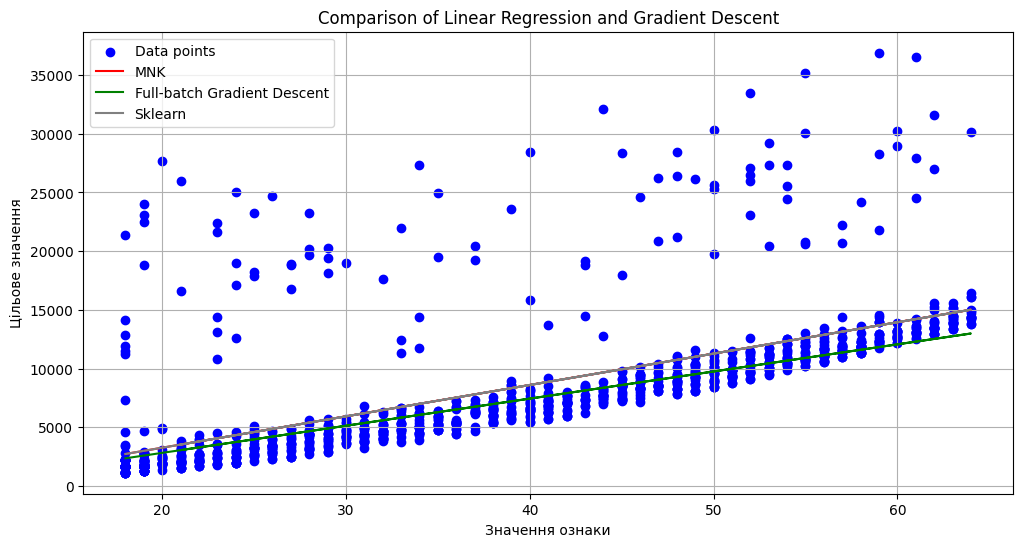

Коефіцієнти
Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з full-batch. град. спуску:  7295.097878019047 3253.8932419215002
Коефіцієнти з sklearn:  -2091.420556565021 [267.24891283]
Помилки
RMSE МНК:  4662.505766636395
RMSE full-batch. град. спуску:  4826.473740471969
RMSE sklearn:  4662.505766636395


count    1064.00000
mean     8434.26830
std      5993.78182
min      1121.87390
25%      3986.43870
50%      7345.40530
75%     11362.88705
max     36910.60803
Name: charges, dtype: float64

In [133]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

print('Коефіцієнти')
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з full-batch. град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

print('Помилки')
print('RMSE МНК: ', rmse)
print('RMSE full-batch. град. спуску: ', rmse_fbgd)
print('RMSE sklearn: ', rmse_sklearn)

non_smoker_df['charges'].describe()




На графіку ми бачимо, що MNK та Sklearn показали кращі результати ніх градієнтний спуск. Я очікував, що моделі навчені всіма способами зможуть показати приблизно однаковий результат - помилку не більше ніж половина середнього значення charges. Найкраще з цим впоралися моделі МНК та sklearn.


 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?